# Sensitivity analysis

**Author** : Saman Hooshvar

Contact : saman.hooshvarfeyzabadi@mail.um.ac.ir

## Project overview

1 - Introduction

2 - WHAT IS SENSITIVITY ANALYSIS?

3 -  Why use sensitivity analysis?

4 - How to perform sensitivity analysis?

5 - How to show sensitivity analysis results?

6 - Sensitivity Analysis in Circuits.

7 - Computing sensitivity in general.

8 - Sensitivity Analysis in Circuits.

9 - Determining sensitivity.

10 - Sensitivity analysis for a **resistive circuit**.
  - Drawing a resistive circuit using schemedraw 
  - Sensitivity analysis in a resistive circuit with PySpice
  - Chart description
  - Determinig circuit sensitivity

11 - Sesitivity analysis for a **voltage divider**.
  - Drawing a simple voltage divider using schemedraw 
  - Sensitivity analysis in a voltage divider with PySpice
  - Chart description

12 - A diffrent angle for Sensitivity analysis in the voltage divider:
    - Chart description

13 - Determining sensitivty

14 - Conclusion

15 - Refrences


## Introduction


Sensitivity analysis is very important especially in the fields 
of electrical and electronics engineering due to the fact 
that circuits practically have **tolerance**.


In reality, there is no such 
thing as a “perfect” component, and each element in an 
electric circuit will always have tolerance values, specifically 
minimum and maximum values.

 For example, if we consider a 
simple $ 100Ω $ resistor, it will always have a tolerance value 
of, for example, five percent (5%). Thus, the minimum and 
maximum values of this electric component are $ 95Ω $ and 
$ 105 Ω $, respectively, without also considering temperature 
effects. Even the most precise electric components available in 
the market have their own tolerances. Thus, there is a need to 
understand the basics of sensitivity and its application to 
electric circuit analysis.


## What is sensitivity analysis?

Sensitivity analysis is the process of calculating how much the output or response of a system changes due to a small change in an input or parameter.

For example, if you have a voltage divider circuit, you can use sensitivity analysis to find out how the output voltage changes when you change the resistance values of the resistors. Sensitivity analysis can help you understand how your circuit behaves under different conditions, and how sensitive it is to variations or uncertainties in the components or parameters.

Sensitivity Analysis is the process of studying how sensitive a system is. If we use math and science to analyze how the output voltage of our voltage divider changes when we change one resistor, we are conducting a sensitivity analysis.

In simple words, sensitivity can be described as the ratio of the change in a measured value to the change in a specific parameter. If a small change in a parameter leads to only a tiny change in the value, we say the system has **low sensitivity**. Conversely, if even a small change in a parameter results in a large change in the measured value, we say the system has **high sensitivity**.

In even simpler words we can say *"by what %(percentages) will y change if I change x by some %"*.

##  Why use sensitivity analysis?

Sensitivity analysis can help you optimize your circuit design in several ways.

1- it can help you identify the critical components or parameters that have the most impact on your circuit performance. By knowing which components or parameters affect your output the most, **you can focus on improving their accuracy, stability, or quality.**

2- it can help you improve the reliability of your circuit by reducing the effects of variations or uncertainties. By knowing how your output varies due to changes in the components or parameters, **you can design your circuit to be more robust or tolerant to those changes.** 

3- it can help you reduce the cost of your circuit by eliminating unnecessary or redundant components or parameters. By knowing how your output depends on the components or parameters, **you can simplify your circuit or use cheaper alternatives without compromising your performance.**

## How to perform sensitivity analysis?

When performing sensitivity analysis, the complexity and type of your circuit, as well as the desired output or response, will determine the method that we will use to perform the sensitivity analysis. 

**Nominal value analysis** is the simplest method, where you calculate the output or response using the expected values of components or parameters. This gives you a baseline to compare with other values.

**worst-case analysis** is a conservative approach which uses the worst-case values of components or parameters to calculate the output or response. This gives you an upper or lower bound of the range.

**Monte Carlo analysis** is a probabilistic method that utilizes random values that follow a certain distribution or probability function. This provides a statistical description of the output or response such as mean, standard deviation, or confidence interval.

In this project we use the **nominal value** analysis because its easier to calculate and demonstrate.

## How to show sensitivity analysis results?

Sensitivity analysis results can be expressed in various ways, such as through sensitivity coefficients, **plots(which we will demonstrate later in this project)** , and histograms. 

**Sensitivity plot** is a graphical representation of how the output or response varies with an input or parameter. For instance, a sensitivity plot of the output voltage versus the resistance value can illustrate the shape and slope of their relationship.

**Sensitivity histogram** is a graphical representation of the frequency or probability of the output or response values. For example, a sensitivity histogram of the output voltage can display its distribution or spread.

## Computing sensitivity in general:

The sensitivity S of a variable Y (like current I) with respect to a parameter X (like resistance R) can be defined as:

 $ S(_X^Y) = \frac{∂Y}{∂X}\frac{X}{Y} $

This formula gives a dimensionless measure of how sensitive Y is to changes in X.

If the changes are small we can simplify the equation to:

$ S(_X^Y) = \frac{Δy/y}{Δx/x} $


## Sensitivity Analysis in Circuits

Sensitivity Analysis measures how the variation in the output of a circuit can be attributed to different variations in its input parameters. This is crucial for understanding how robust a circuit design is against component **tolerances**.

or in other words , Sensitivity analysis in circuits refers to studying how variations in circuit parameters (like resistance, capacitance, etc.) affect the output (like current or voltage).

For example in the below circuit we can change any X element in the circuit and then compute any Y output and and then see the changes we writes that as  $ S(_X^Y)$.

or if you want a more precise example we can change the R1 value and compute the output voltage in that case **the sensitivity of output voltage wuth respect to R1 is written as: $ S(_{R_1}^V)$ .**

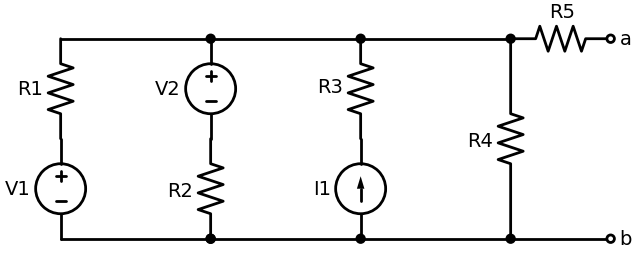

In [5]:
import schemdraw
from schemdraw import elements as elm

with schemdraw.Drawing() as d:
    d.config(unit=2)
    d.push()
    R1 = elm.Resistor().down().label('R1')
    V1 = elm.SourceV().down().reverse().label('V1')
    elm.Line().right(3).dot()
    d.pop()
    elm.Line().right(3).dot()
    elm.SourceV().down().reverse().label('V2')
    elm.Resistor().label('R2').dot()
    elm.Line().right(3).dot()
    elm.SourceI().up().label('I1')
    elm.Resistor().label('R3').dot()
    elm.Line().left(3).hold()
    elm.Line().right(3).dot()
    R6 = elm.Resistor().toy(V1.end).label('R4').dot()
    elm.Line().left(3).hold()
    elm.Resistor().right().at(R6.start).label('R5').dot(open=True).label('a', 'right')
    elm.Line().right().at(R6.end).dot(open=True).label('b', 'right')

## Determining sensitivity

To determine whether this voltage divider is sensitive or not, we can look at the size of these derivatives.

- If $ S(_X^Y)$ is large, then the Y element is considered sensitive with respect to the X element.
- Otherwise, if these values are small, it indicates that changes in X have little effect on the Y.


## **Sensitivity analysis for a resistive circuit**

For a simple resistive circuit, you can use Ohm's Law:


$ I = \frac{V}{R} $


To find the sensitivity of **current**(I) with respect to **resistance**(R):


$ S(_R^I) = \frac{∂I}{∂R} \frac{R}{I} $


Calculating the partial derivative:


$ \frac{∂I}{∂R} = -\frac{V}{R^2}$


So,


$ S(_R^I) = -\frac{V}{R^2} \frac{R}{I} = -\frac{V}{R} I $

Now to calculate it based on the elements in our resistive curcuit.
The source voltage is 10V and the value of R changes beetwen 0 to 100 in order to see the changes in the output current.

## Drawing a resistive circuit using schemedraw 

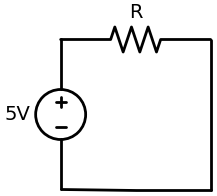

In [1]:
import schemdraw
from schemdraw import elements as elm

with schemdraw.Drawing():
    C = elm.Resistor().label('R')
    elm.Line().down()

    elm.Line().tox(C.start)

    elm.SourceV().label('5V').up()


## Sensitivity analysis in a resistive circuit with PySpice

Here we want to see the changes in current while cahnging the value of R.

**Step 1 : Defining the resistances and voltage sources ,** A voltage source of 10 volts is defined And an array of resistance values is created, ranging from 1 to 100 ohms.

**Step 2 : Calculating current**
- The current ($ I$) through the resistor is calculated using Ohm's Law: $ I = \frac{V}{R} \ $.
- The calculated current value is stored in I_values.

**Step 3 : Drawing Chrachteristic curve,**
a chart is generated to visualize the relationship between resistance and current. 

**Step 4 : Calculating sensitivity**

$ S(_I^R) = \frac{∂I}{∂R} \frac{R}{I} $
$ = -\frac{V}{R^2}$

Substituting the values:

$ S = (-\frac{V}{R^2}) ·\frac{R}{V/R} = (-\frac{V}{R^2})·\frac{R^2}{V} = -1 $

The sensitivity S = -1 indicates that for a 1% increase in resistance, there will be a 1% decrease in current.

**Step 5 : plotting the results ,** then we plot the results using matplotlib.


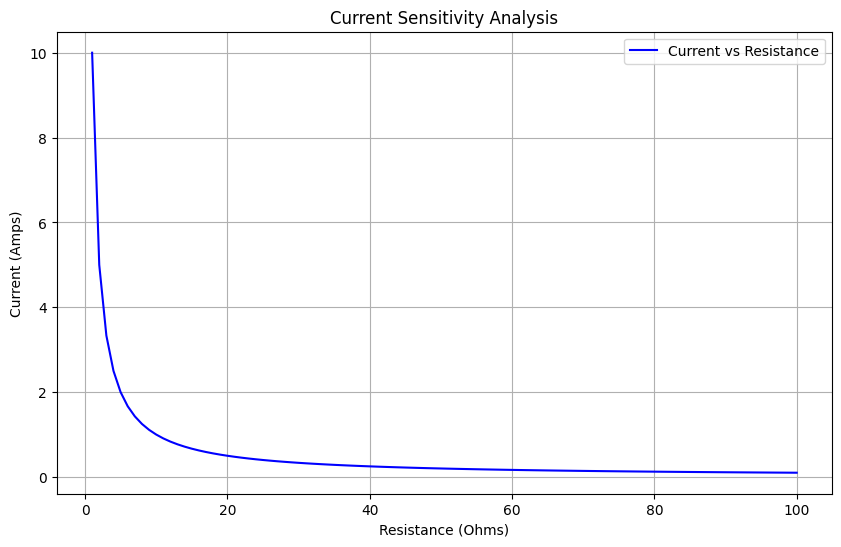

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import PySpice
from PySpice.Spice.Netlist import Circuit

V_source = 10 
R_values = np.linspace(1, 100, 100)  

I_values = []

for R in R_values:
    circuit = Circuit('Sensitivity Analysis')
    circuit.V(1, 'input', circuit.gnd, V_source)
    circuit.R(1, 'input', 'output', R)

    simulator = circuit.simulator(temperature=25, nominal_temperature=25)

    analysis = simulator.operating_point()

    I = V_source / R
    I_values.append(I) 

plt.figure(figsize=(10, 6))
plt.plot(R_values, I_values, label='Current vs Resistance', color='blue')
plt.title('Current Sensitivity Analysis')
plt.xlabel('Resistance (Ohms)')
plt.ylabel('Current (Amps)')
plt.grid()
plt.legend()
plt.show()


## Chart explination

The **x-axis** represents resistance values, while the **y-axis** represents current values. The absolute value of sensitivity is 1, which indicates a direct relationship between changes in resistance and changes in current. and as you can see for each 1% increase in resistance we have 1% decrease in current.



## Determinig circuit sensitivity

Since a small change in R leads to a proportional change in I, we can conclude that the circuit is sensitive to changes in resistance.
this means that if you were to change the resistance by a small amount, you would observe a significant change in the current flowing through the circuit. Thus, **the circuit can be considered sensitive**.

## **Sensitivity analysis for a voltage divider**

Consider a voltage divider circuit shown in the code below. The circuit 
is composed of a constant dc voltage source and two resistors 
in series. The output is the voltage across the 100-ohm 
resistor, while the input is a $ 5V $ dc voltage source. The 
value of the series resistance is 50 ohms with a tolerance of 
5%, while the 100-ohm resistor has a tolerance of 2%. Thus, if 
the 50-ohm resistor has a 5% tolerance, then its value can vary 
from 47.5 to 52.5 ohms. On other hand, if the 100-ohm 
resistor has a 2% tolerance, then its value can vary from 98 to 
102 ohms. 


## Drawing a simple voltage divider using schemedraw 

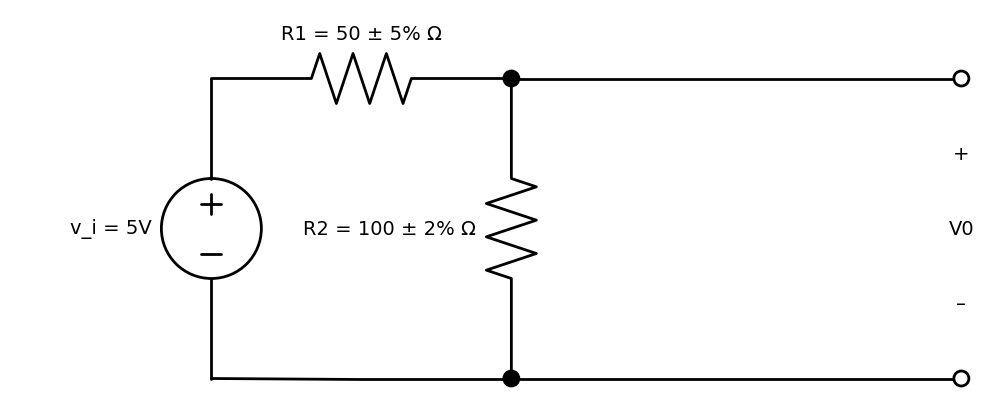

In [3]:
import schemdraw
from schemdraw import elements as elm

with schemdraw.Drawing() as d:
    d.config(inches_per_unit=1, unit=3)
    V = elm.SourceV().label('v_i = 5V')
    d += elm.Resistor().right().label('R1 = 50 ± 5% Ω', loc='top')
    D = elm.Resistor().down().label('R2 = 100 ± 2% Ω')
    d += elm.Line().to(V.start)
    elm.Line().right(d.unit*1.5).at(D.start).dot(open=True).idot()
    elm.Line().right(d.unit*1.5).at(D.end).dot(open=True).idot()
    G = elm.Gap().toy(D.start).label(['–', 'V0', '+'])

## Sensitivity analysis in a voltage divider with PySpice


**Step 1 : defining voltage and resistances**
- we take two resistances ($ R1 $ and $ R2 $) and an optional input voltage $ V_{in} $, which in this example is $ 5V$.

**Step 2 : calculating output volatage ,** It calculates the output voltage ($ V_{out} $) using the voltage divider formula: 
  
  $V_{out} = V_{in} \frac{R2}{R1 + R2}\ $

**Step 3 : Definng Ranges ,** in this step we define the ranges of resistances which for $R1 $ it can change from 47.5 to 52.5 and for $ R2$ it can change from 98 to 102.

**Step 4 : sensitivity matrix ,** A matrix is created to store output voltages for each combination of $ R1$ and $ R2$.

**Step 5 : Calculating Sensitivity ,** For each combination, we compute the output voltage using the formula that was mentioned earlier and store it in the sensitivity_matrix.

**Step 6 : plotting the results ,** then we plot the results using matplotlib.


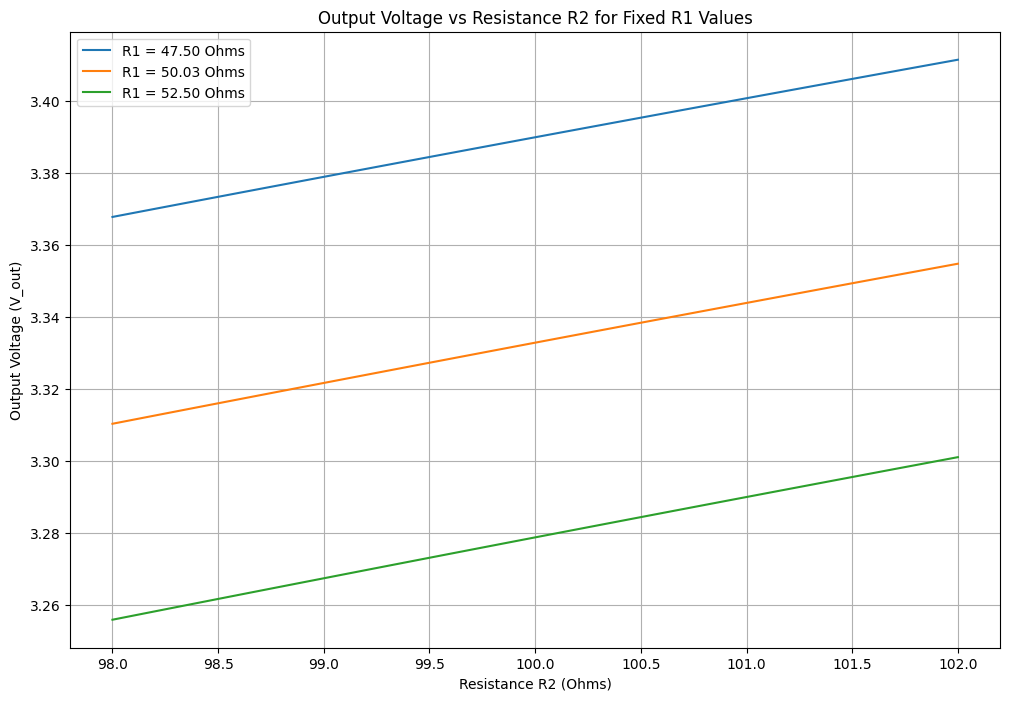

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import PySpice
from PySpice.Spice.Netlist import Circuit

def simulate_circuit(R1, R2, Vin=5.0):
    if R1 <= 0 or R2 <= 0:
        return np.nan
    V_out = Vin * (R2 / (R1 + R2))
    return V_out

R1_values = np.linspace(47.5, 52.5, 100)  
R2_values = np.linspace(98, 102, 100) 

sensitivity_matrix = np.zeros((len(R1_values), len(R2_values)))

for i, R1_val in enumerate(R1_values):
    for j, R2_val in enumerate(R2_values):
        output_voltage = simulate_circuit(R1_val, R2_val)
        sensitivity_matrix[i, j] = output_voltage


plt.figure(figsize=(12, 8))


fixed_R1_indices = [0, 50, 99]  
for idx in fixed_R1_indices:
    plt.plot(R2_values, sensitivity_matrix[idx], label=f'R1 = {R1_values[idx]:.2f} Ohms')

plt.xlabel('Resistance R2 (Ohms)')
plt.ylabel('Output Voltage (V_out)')
plt.title('Output Voltage vs Resistance R2 for Fixed R1 Values')
plt.legend()
plt.grid()
plt.show()



## Chart decription
- **X-axis (Resistance $ R2$)**: This axis represents the varying resistance $ R2$ values, ranging from 98 to 102 ohms.
- **Y-axis (Output Voltage ($V_{out} $))**: This axis shows the calculated output voltage for each combination of $ R1$ and $ R2$.
- **Lines**: Each line is a fixed value of $ R1$ (47.5, 50.0, and 52.5 ohms). The lines show how the output voltage changes as $R $ varies.


## A diffrent angle for Sensitivity analysis in the voltage divider:

In this section we want to calcute the sensitivty itself using the formula that was mentioned earlier and plot the result based on that.

**Step 1 : defining voltage and resistances**
- we take two resistances ($ R1 $ and $ R2 $) and an optional input voltage $ V_{in} $, which in this example is $ 5V$.

**Step 2 : calculating output volatage ,** It calculates the output voltage ($ V_{out} $) using the voltage divider formula: 
  
  $V_{out} = V_{in} \frac{R2}{R1 + R2}\ $

**Step 3 : Definng Ranges ,** in this step we define the ranges of resistances which for $R1 $ it can change from 47.5 to 52.5 and for $ R2$ it can change from 98 to 102.

**Step 4 : sensitivity matrix ,** A matrix is created to store output voltages for each combination of $ R1$ and $ R2$.

(*the 4 first steps were similar to the last section*)

**Step 5 : Calculate Sensitivity ,** For each combination, it calculates the output voltage $ V_{out}$. 
If $ V_{out}$ is valid, it computes  $ \frac{dV}{dR_2}$ of $V_{out} $ with respect to $ R2$:

$ \frac{dV}{dR_2} = \frac{V_{in}  R1}{(R1 + R2)^2} $
    
- This equation shows how much the output voltage changes with a small change in $ R2$.
- The sensitivity is then calculated as:
     
     $ S(_R^V) = \frac{V_{in}  R1}{(R1 + R2)^2} \frac{R_2}{V_{out}} $
     

**Step 6 : The Sensitivity Matrix ,** This section creates a plot showing the sensitivity of the output voltage with respect to $R2 $ for selected fixed values of $ R1$.



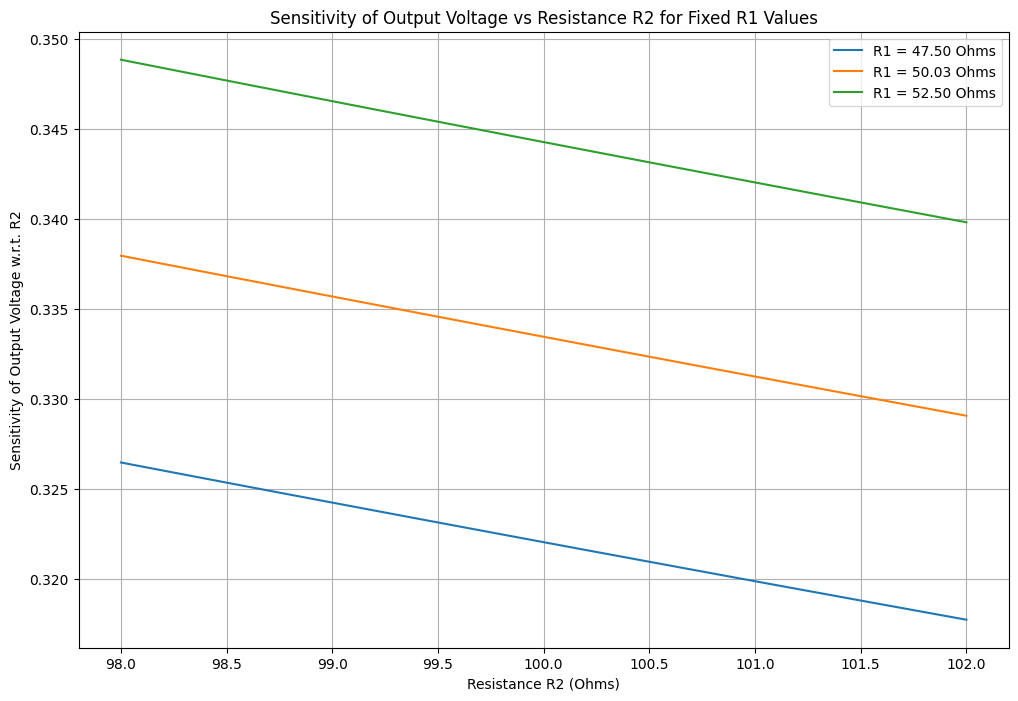

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import PySpice 

def simulate_circuit(R1, R2, Vin=5.0):
    if R1 <= 0 or R2 <= 0:
        return np.nan 
    V_out = Vin * (R2 / (R1 + R2))
    return V_out


R1_values = np.linspace(47.5, 52.5, 100)
R2_values = np.linspace(98, 102, 100)

sensitivity_matrix = np.zeros((len(R1_values), len(R2_values)))

Vin = 5.0
for i, R1_val in enumerate(R1_values):
    for j, R2_val in enumerate(R2_values):
        V_out = simulate_circuit(R1_val, R2_val)
        if not np.isnan(V_out):  
            dV_dR2 = Vin * (R1_val / (R1_val + R2_val)**2)
            sensitivity_matrix[i, j] = dV_dR2 * (R2_val / V_out)
        else:
            sensitivity_matrix[i, j] = np.nan  


plt.figure(figsize=(12, 8))

fixed_R1_indices = [0, 50, 99]
for idx in fixed_R1_indices:
    plt.plot(R2_values, sensitivity_matrix[idx], label=f'R1 = {R1_values[idx]:.2f} Ohms')

plt.xlabel('Resistance R2 (Ohms)')
plt.ylabel('Sensitivity of Output Voltage w.r.t. R2')
plt.title('Sensitivity of Output Voltage vs Resistance R2 for Fixed R1 Values')
plt.legend()
plt.grid()
plt.show()

## Chart description 

- **X-axis (Resistance $ R2$)**: This axis represents the varying resistance $ R2$ values, ranging from 98 to 102 ohms.
- **Y-axis (Sensitivity)**: This axis shows the calculated sensitivity using the original formula for each combination of $ R1$ and $ R2$.
- **Lines**: Each line is a fixed value of $ R1$ (47.5, 50.0, and 52.5 ohms). The lines show how the output voltage changes as $R $ varies.


## Determining sensitivity

As we saw in the first plot we tried to show the output voltage and it could be seen from the charts that:
- **The output voltage** is quite sensitive to changes in both resistances, especially when $ R1$ and $R2 $ are close in value, as seen in the plot where small changes in $ R2$ lead to noticeable changes in $V_{out} $.
- **The sensitivity analysis** shows that increasing $R2 $ will increase $V_{out} $, while increasing $R1 $ will decrease it. The actual sensitivity will depend on specific values of $ R1$ and $R2 $.

this means that if precise control over output voltage is required, careful consideration must be given to changes in both resistances, we can consider the circuit in this  example **sensitive**.


## Conclusion

In conclusion, this sensitivity analysis mini-project has provided valuable insights into the behavior of our system under varying conditions. By systematically examining the impact of changes in key parameters, It provides insights into how design choices regarding resistances can impact circuit performance, which is critical in applications where precision is necessary.critical factors were identified that significantly influence the output. Furthermore, we analayzed the sensitivity of a resistor circuit and a voltage divider as an example to realize the importance of sensitivity analysis. 

## Refrences:

https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://corporatefinanceinstitute.com/resources/financial-modeling/what-is-sensitivity-analysis/&ved=2ahUKEwiJ6bah14GJAxVj9LsIHRW_CTIQFnoECEAQAQ&usg=AOvVaw0gS-q97jG-1-Y8nURiUnZf

https://en.wikipedia.org/wiki/Sensitivity_analysis

ENGINEERING CIRCUIT ANALYSIS(William H. Hayt, Jr. (deceased))

Linear circuits(Reymond A. Decarlo)

https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://www.investopedia.com/terms/s/sensitivityanalysis.asp&ved=2ahUKEwin2dmn3oGJAxXpa_EDHe9IG9sQFnoECBcQAQ&usg=AOvVaw3-eFkCZ1ViTWwXP51hRM9r

https://www.ti.com/lit/an/slva481/slva481.pdf?ts=1728543180256

https://www.linkedin.com/advice/0/how-can-you-use-sensitivity-analysis-optimize-rf7pc
